In [82]:
import re 
import nltk 
import string 
import warnings 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ssl


In [83]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to /Users/sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

Import CSV Data Files

In [85]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Exploratory Data Analysis 

In [86]:
train[train['target'] == 1].head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [87]:
train[train['target'] == 0].head(3)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0


In [88]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [89]:
train.shape

(7613, 5)

In [90]:
test.shape

(3263, 4)

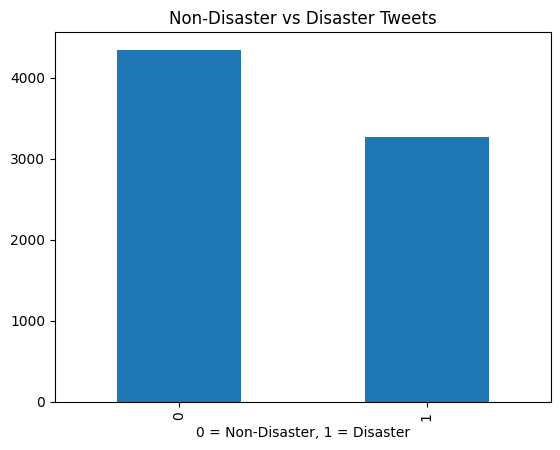

In [91]:
ax = train['target'].value_counts().sort_index()\
    .plot(
        kind = 'bar',
        title = 'Non-Disaster vs Disaster Tweets'
    )

ax.set_xlabel("0 = Non-Disaster, 1 = Disaster")
plt.show()

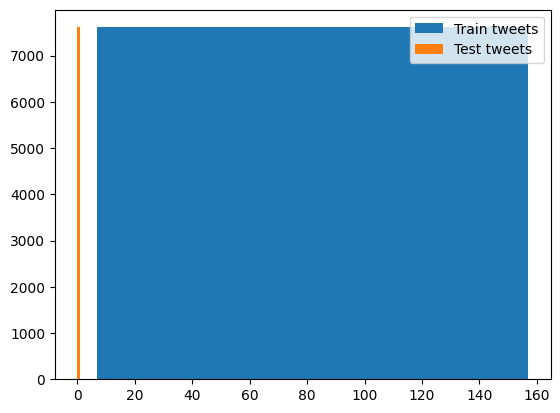

In [92]:
length_train = train['text'].str.len()
target_train = train['target']

plt.hist(length_train, bins=1,label="Train tweets")
plt.hist(target_train, bins=1,label="Test tweets")

plt.legend()
plt.show()

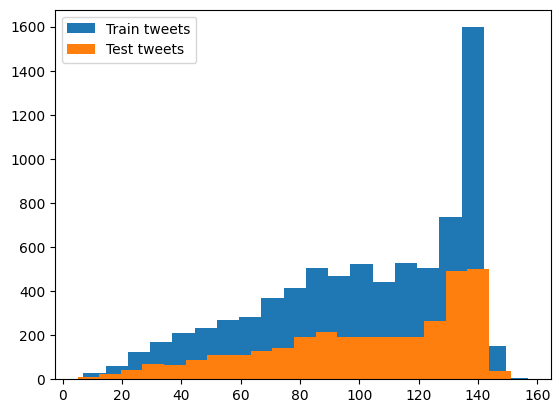

In [93]:
length_train = train['text'].str.len()
length_test = test['text'].str.len()

plt.hist(length_train, bins=20, label="Train tweets")
plt.hist(length_test, bins=20, label="Test tweets")

plt.legend()
plt.show()

In [94]:
combine = train.append(test, ignore_index=True)
combine.shape

/var/folders/mp/60r0v21d3bn_1j9h07mqxny00000gn/T/ipykernel_17460/1712868305.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test, ignore_index=True)


(10876, 5)

In [95]:
combine['text'].head(10)

0                                                                    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                   Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                        13,000 people receive #wildfires evacuation orders in California 
4                                                 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
5                           #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6                                          #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
7                          

In [96]:
clean_pattern = re.compile(r'(@[\w]*)|(https?:\/\/t\.co\/.+)|(#)|([^a-zA-Z0-9\s])|([R][T])')
combine["text"] = combine["text"].str.replace('(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])','').str.lower()

combine['text'].head(10)

    

/var/folders/mp/60r0v21d3bn_1j9h07mqxny00000gn/T/ipykernel_17460/1889916352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combine["text"] = combine["text"].str.replace('(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])','').str.lower()


0                                                                  our deeds are the reason of this earthquake may allah forgive us all
1                                                                                                 forest fire near la ronge sask canada
2    all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3                                                                       13000 people receive wildfires evacuation orders in california 
4                                                just got sent this photo from ruby alaska as smoke from wildfires pours into a school 
5                               rockyfire update  california hwy 20 closed in both directions due to lake county fire  cafire wildfires
6                                          flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas
7                                               

STOP WORDS REMOVAL

In [97]:
",".join(stopwords.words('english'))
stops_words = set(stopwords.words('english'))

In [98]:
combine['text'] = combine['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops_words)]))

In [99]:
combine['text'].head(10)

0                                                  deeds reason earthquake may allah forgive us
1                                                         forest fire near la ronge sask canada
2      residents asked shelter place notified officers evacuation shelter place orders expected
3                                   13000 people receive wildfires evacuation orders california
4                                       got sent photo ruby alaska smoke wildfires pours school
5    rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires
6        flood disaster heavy rain causes flash flooding streets manitou colorado springs areas
7                                                                    im top hill see fire woods
8                                  theres emergency evacuation happening building across street
9                                                                 im afraid tornado coming area
Name: text, dtype: object

Lemmatization

In [100]:
from nltk.stem import WordNetLemmatizer, PorterStemmer 
stemmer = PorterStemmer()
wnl = WordNetLemmatizer()

combine['text'] = combine['text'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))
combine['text'].head(10)

0                                                  deed reason earthquake may allah forgive u
1                                                       forest fire near la ronge sask canada
2       resident asked shelter place notified officer evacuation shelter place order expected
3                                   13000 people receive wildfire evacuation order california
4                                      got sent photo ruby alaska smoke wildfire pours school
5    rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire
6          flood disaster heavy rain cause flash flooding street manitou colorado spring area
7                                                                   im top hill see fire wood
8                                 there emergency evacuation happening building across street
9                                                               im afraid tornado coming area
Name: text, dtype: object

STEMMING

In [101]:

#wnl.lemmatize(combine['text']) if wnl.lemmatize(combine['text']).endswith('e')  else stemmer.stem(combine['text'])

#combine['text'] = combine['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [106]:
pip install gensim

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 18.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [115]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['text'])
bow.shape

(10876, 3000)

In [116]:
combine = combine.fillna(0)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(bow, combine['target'], random_state=69, test_size=0.3)

In [117]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (7613, 3000)
xtest shape:  (3263, 3000)
ytrain shape:  (7613,)
ytest shape:  (3263,)


In [118]:
from sklearn.naive_bayes import MultinomialNB

model_naive = MultinomialNB().fit(xtrain, ytrain)
prediction_naive = model_naive.predict(xtest)

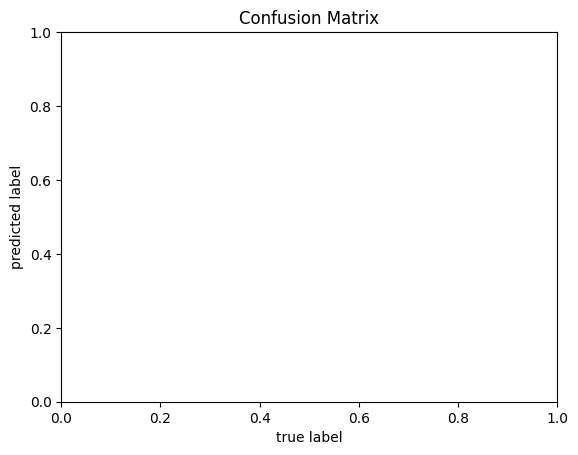

In [119]:
plt.title("Confusion Matrix")
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig("confusion_matrix.png")
plt.show()

In [103]:
#https://www.youtube.com/watch?v=MA5nwEd9hKY&t=880s&ab_channel=Techopedia

#19:29